# Explore here

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import *
import matplotlib.pyplot as plt
import numpy as np
import requests
import missingno as msno
import xgboost as xgb
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
response = requests.get(url).content.decode('utf-8')

file_name = '../data/raw/demographic_health_data.csv'

with open(file_name, 'w') as temp_file:
    temp_file.writelines(response)

In [3]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [4]:
df = pd.read_csv(file_name)
pd.set_option('display.max_columns', None)
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [5]:
#Buscamos registros duplicados, no hay.
print(df.duplicated().sum())

0


In [6]:
#Obtenemos los valores únicos para averiguar si hay columnas que puedan ser binarias, no las hay.
pd.set_option('display.max_rows', None,)
n_unicos = df.nunique()
n_unicos

fips                                                                             3140
TOT_POP                                                                          3074
0-9                                                                              2723
0-9 y/o % of total pop                                                           3136
19-Oct                                                                           2743
10-19 y/o % of total pop                                                         3137
20-29                                                                            2698
20-29 y/o % of total pop                                                         3137
30-39                                                                            2708
30-39 y/o % of total pop                                                         3133
40-49                                                                            2693
40-49 y/o % of total pop                              

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [8]:
# No hay valores null
pd.set_option('display.max_rows', None,)
df.isnull().mean()*100

fips                                                                             0.0
TOT_POP                                                                          0.0
0-9                                                                              0.0
0-9 y/o % of total pop                                                           0.0
19-Oct                                                                           0.0
10-19 y/o % of total pop                                                         0.0
20-29                                                                            0.0
20-29 y/o % of total pop                                                         0.0
30-39                                                                            0.0
30-39 y/o % of total pop                                                         0.0
40-49                                                                            0.0
40-49 y/o % of total pop                                         

No hay valores nulos, por lo que no necesito usar el msno.matrix(df) para ver correlacciones, ni necesito quitar columnas, ni necesito rellenarlas por aproximación.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [10]:
# Procedo a factorizar las columnas que son objetos

states = df['STATE_NAME'].value_counts().reset_index()
countys = df['COUNTY_NAME'].value_counts().reset_index()

df['STATE_NAME_f'] = list(map(lambda a: states["count"][states['STATE_NAME'] == a].values[0]/len(df)*100, df['STATE_NAME']))
df['COUNTY_NAME_f'] = list(map(lambda a: countys["count"][countys['COUNTY_NAME'] == a].values[0]/len(df)*100, df['COUNTY_NAME']))



In [11]:
df[['STATE_NAME','COUNTY_NAME','STATE_NAME_f','COUNTY_NAME_f']].head()

,STATE_NAME,COUNTY_NAME,STATE_NAME_f,COUNTY_NAME_f
0,Alabama,Autauga,2.133758,0.031847
1,Alabama,Baldwin,2.133758,0.063694
2,Alabama,Barbour,2.133758,0.063694
3,Alabama,Bibb,2.133758,0.063694
4,Alabama,Blount,2.133758,0.063694


In [12]:
df1 = df.drop(['STATE_NAME','COUNTY_NAME'], axis=1)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to COUNTY_NAME_f
dtypes: float64(63), int64(45)
memory usage: 2.6 MB


In [14]:
#Separamos la variable dependiente de las independientes (y las variables no factorizadas) con el nuevo dataframe 
X = df1.drop(['Heart disease_number'], axis=1)
y = df1['Heart disease_number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
print(df_imp)

                                               Feature  Importance
84                                 anycondition_number   48.238602
103                                         CKD_number   20.972858
74                                          ICU Beds_x    9.937111
80                         county_pop2018_18 and older    3.737236
99                                     diabetes_number    3.616724
95                                         COPD_number    3.218785
24           Native American/American Indian-alone pop    2.633168
18                                                 80+    1.842179
1                                              TOT_POP    1.549481
88                                      Obesity_number    1.403181
76                                 Population Aged 60+    1.365038
58                                     Unemployed_2018    0.801122
16                                               70-79    0.155990
49                                         POVALL_2018    0.15

In [16]:
# Me quedo con las columnas de importancia mayor al 1% y las columnas relaccionadas con problemas del corazón, ya que están relacionadas

df2 = df1[['anycondition_number','CKD_number','ICU Beds_x','county_pop2018_18 and older','diabetes_number','COPD_number','Native American/American Indian-alone pop','80+','TOT_POP','Obesity_number','Population Aged 60+','Heart disease_number','Heart disease_prevalence']]


# X = df1.drop(['Heart disease_number'], axis=1)
# y = df1['Heart disease_number']


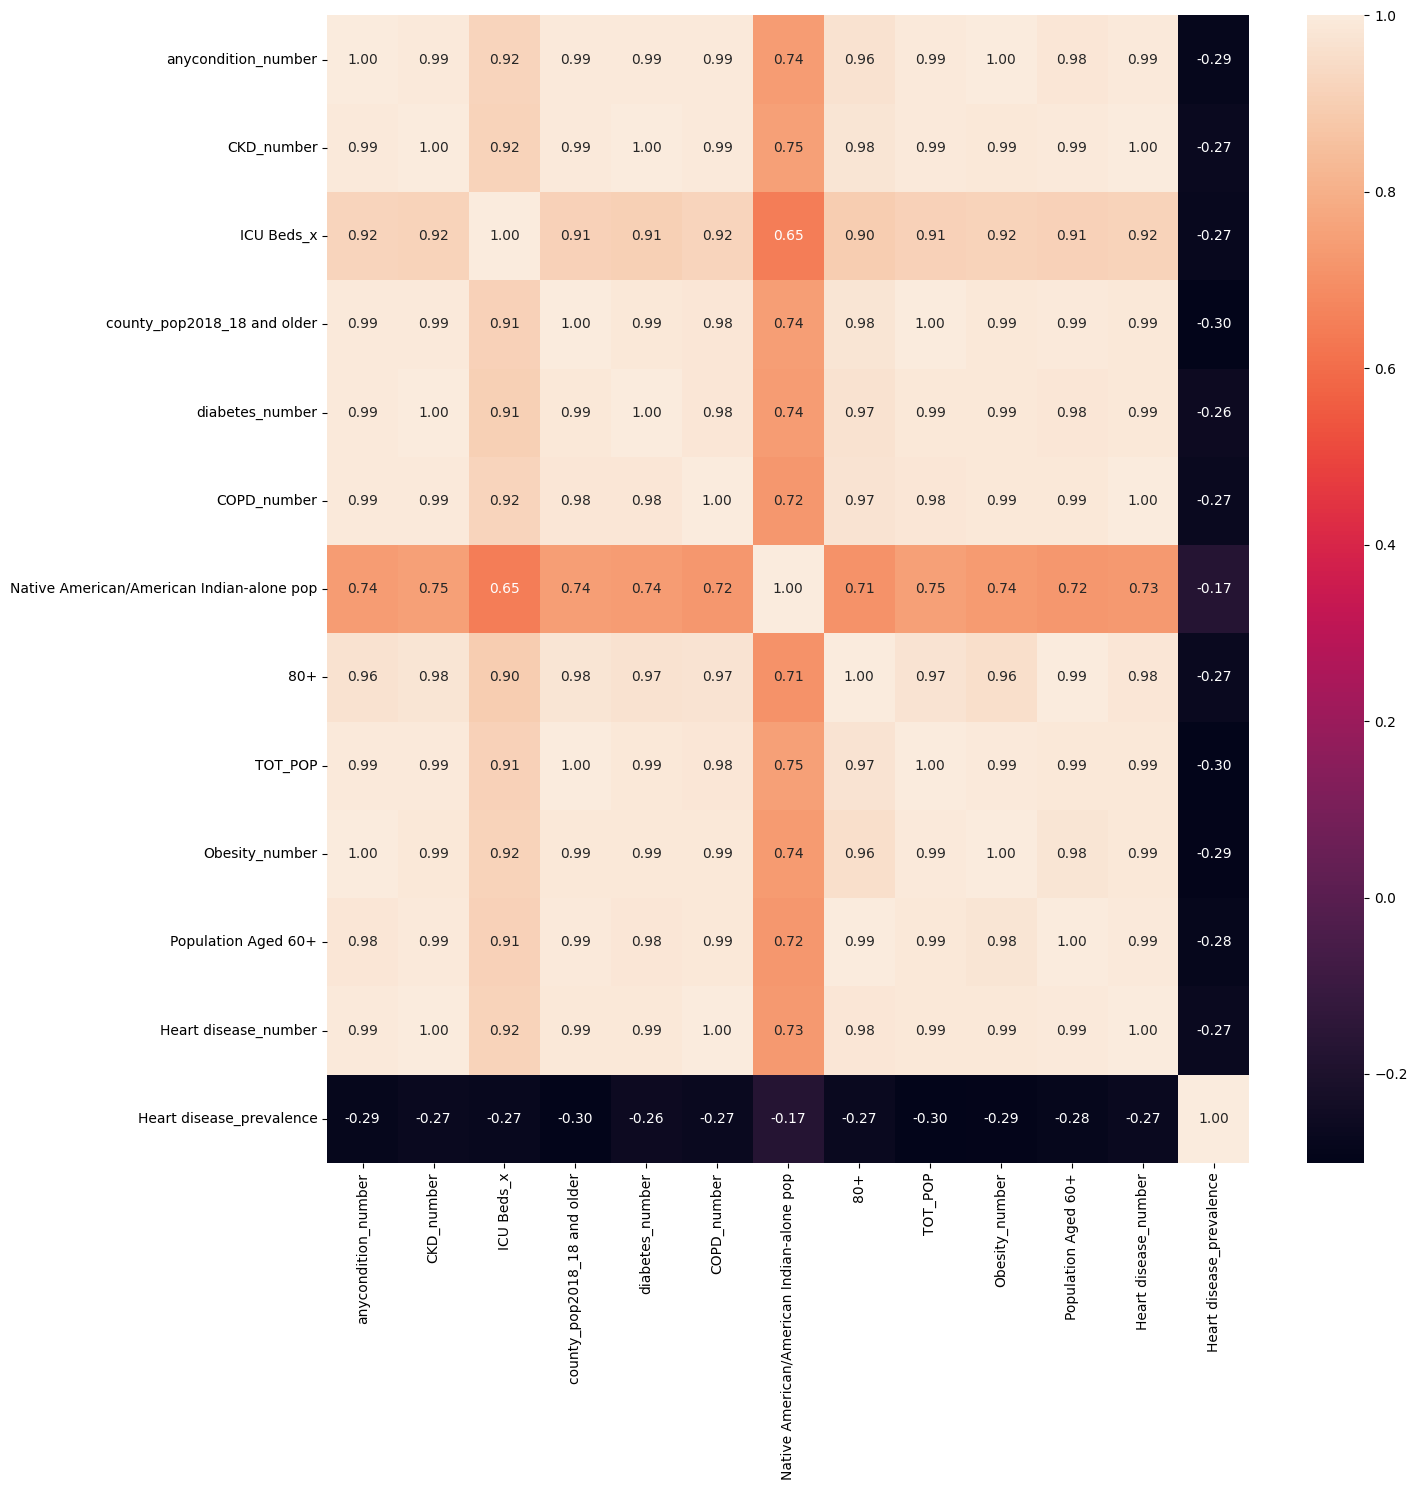

In [17]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(df2.corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

In [18]:
'''
Teniendo en cuenta que Heart disease_number está fuertemente relaccionada con el resto de variables, al igual que el 
resto de variables entre ellas, ya que nos hemos quedado con las variables de más importancia de un número muy alto de variables,
voy a elegir Heart disease_prevalence como variable dependiente

'''

'\nTeniendo en cuenta que Heart disease_number está fuertemente relaccionada con el resto de variables, al igual que el \nresto de variables entre ellas, ya que nos hemos quedado con las variables de más importancia de un número muy alto de variables,\nvoy a elegir Heart disease_prevalence como variable dependiente\n\n'

In [19]:
X = df2.drop(['Heart disease_prevalence'], axis=1)
y = df2['Heart disease_prevalence']

# Formamos los conjuntos de entrenamiento y de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
m_lineal = LinearRegression().fit(X_train_scaled, y_train)
yhat_train = m_lineal.predict(X_train_scaled)
yhat_test = m_lineal.predict(X_test_scaled)

In [22]:
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [23]:
get_metrics(yhat_test, y_test, yhat_train, y_train)

,R2,Median AE,MAPE
Train set,0.210712,1.011954,15.187174
Test set,0.166740,0.998096,15.475726
Diferencia,-0.043972,-0.013858,0.288552


In [24]:
m_lineal.coef_

array([ 7.33138027,  4.12826344,  0.08374383, -3.49187569, -0.33579495,
       -2.03146381,  0.01374706, -1.29181706, -1.28447674, -6.73995511,
        0.50135339,  2.51866253])

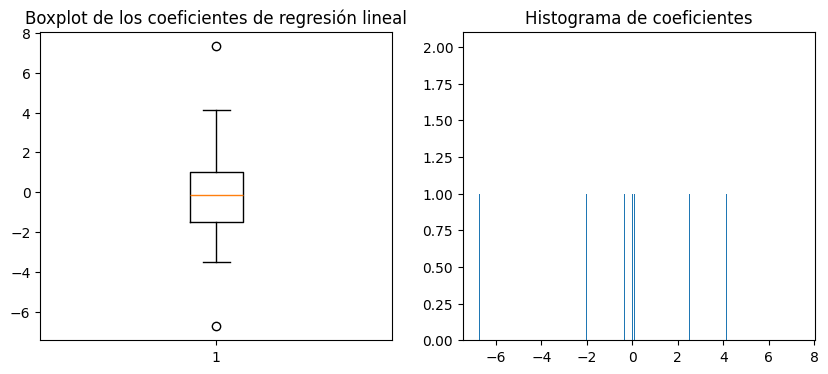

In [25]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lineal.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_lineal.coef_,500)
plt.title('Histograma de coeficientes')
plt.show()

## Lasso

In [26]:
m_lasso = LassoCV(alphas=np.logspace(-6, 6, 10), cv=5, random_state=42, n_jobs=-1).fit(X_train_scaled, y_train)
yhat_train_lasso = m_lasso.predict(X_train_scaled)
yhat_lasso = m_lasso.predict(X_test_scaled)

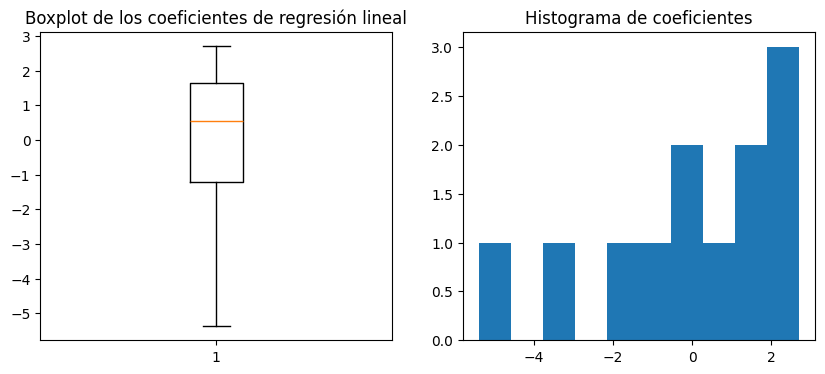

In [27]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lasso.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_lasso.coef_,10)
plt.title('Histograma de coeficientes')
plt.show()

In [28]:
print(f'El porcentaje de variables canceladas es: {round(len(m_lasso.coef_[np.abs(m_lasso.coef_)==0])/len(m_lasso.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_lasso.coef_[np.abs(m_lasso.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 0.0%
El modelo utiliza 12 variables.


In [29]:
get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train)

,R2,Median AE,MAPE
Train set,0.201054,1.017820,15.270417
Test set,0.132485,1.026343,15.463725
Diferencia,-0.068569,0.008522,0.193308


## Ridge

In [30]:
m_ridge = RidgeCV(alphas=np.logspace(-6, 6, 10), cv=5).fit(X_train_scaled, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_ridge = m_ridge.predict(X_train_scaled)
yhat_ridge = m_ridge.predict(X_test_scaled)

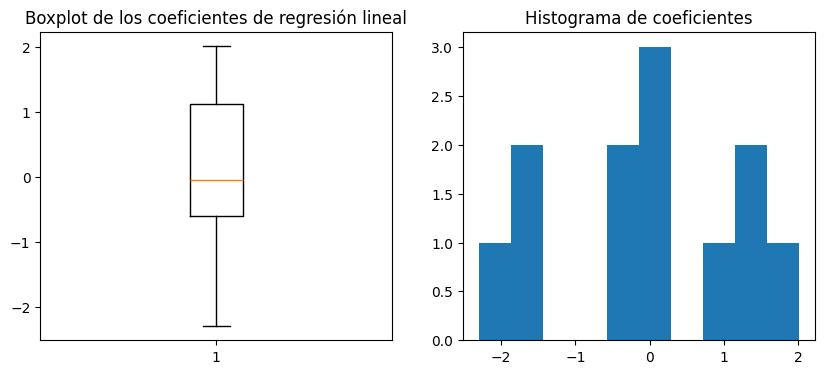

In [31]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_ridge.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_ridge.coef_,10)
plt.title('Histograma de coeficientes')
plt.show()

In [32]:
print(f'El porcentaje de variables canceladas es: {round(len(m_ridge.coef_[np.abs(m_ridge.coef_)==0])/len(m_ridge.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_ridge.coef_[np.abs(m_ridge.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 0.0%
El modelo utiliza 12 variables.


In [33]:
get_metrics(yhat_ridge, y_test, yhat_train_ridge, y_train)

,R2,Median AE,MAPE
Train set,0.196034,1.022117,15.358568
Test set,0.185417,1.017847,15.319259
Diferencia,-0.010617,-0.004270,-0.039309


# Pruebo con el set de datos completo

In [34]:
X = df1.drop(['Heart disease_prevalence'], axis=1)
y = df1['Heart disease_prevalence']

# Formamos los conjuntos de entrenamiento y de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
m_lineal = LinearRegression().fit(X_train_scaled, y_train)
yhat_train = m_lineal.predict(X_train_scaled)
yhat_test = m_lineal.predict(X_test_scaled)

In [37]:
get_metrics(yhat_test, y_test, yhat_train, y_train)

,R2,Median AE,MAPE
Train set,0.999510,0.026604,0.384499
Test set,0.999423,0.027912,0.419590
Diferencia,-0.000087,0.001309,0.035091


## Lasso

In [38]:
m_lasso = LassoCV(alphas=np.logspace(-6, 6, 10), cv=5, random_state=42, n_jobs=-1).fit(X_train_scaled, y_train)
yhat_train_lasso = m_lasso.predict(X_train_scaled)
yhat_lasso = m_lasso.predict(X_test_scaled)

In [39]:
print(f'El porcentaje de variables canceladas es: {round(len(m_lasso.coef_[np.abs(m_lasso.coef_)==0])/len(m_lasso.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_lasso.coef_[np.abs(m_lasso.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 79.44%
El modelo utiliza 22 variables.


In [40]:
get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train)

,R2,Median AE,MAPE
Train set,0.999461,0.026425,0.411719
Test set,0.999416,0.027264,0.426048
Diferencia,-0.000045,0.000839,0.014330


## Ridge

In [41]:
m_ridge = RidgeCV(alphas=np.logspace(-6, 6, 10), cv=5).fit(X_train_scaled, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_ridge = m_ridge.predict(X_train_scaled)
yhat_ridge = m_ridge.predict(X_test_scaled)

In [42]:
print(f'El porcentaje de variables canceladas es: {round(len(m_ridge.coef_[np.abs(m_ridge.coef_)==0])/len(m_ridge.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_ridge.coef_[np.abs(m_ridge.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 0.0%
El modelo utiliza 107 variables.


In [ ]:
get_metrics(yhat_test, y_test, yhat_train, y_train)

,R2,Median AE,MAPE
Train set,0.999510,0.026604,0.384499
Test set,0.999423,0.027912,0.419590
Diferencia,-0.000087,0.001309,0.035091


# Conclusiones finales

En un principio opte por hacer un EDA completo, eliminando todas las variables con una importancia inferior al 1%, sin embargo, reflexionando sobre las optimizaciones que estamos haciendo, donde ambos algoritmos puede reducir, o eliminar, el coeficiente de las variables, he considerado que lo ideal es mantener todas las variables, ya que dichos algoritmos se encargan, de una forma mucho más eficiente y proporcionada, de reducir o eliminar los coeficientes de todas las variables, en lugar de simplemente eliminarlas como hago en el EDA completo.

Una vez visto esto, y elegir el set con todas las variables, podemos observar comparando los resultados de Lasso y Ridge que ambos tiene unas métricas mucho mejores de aciertos que los mismos algoritmos usados en el set del EDA completo, con los mismos algoritmos aplicados a este set, o sin aplicarlos, solo con la regresión lineal.

De los dos algoritmos aplicados al set completo, podemos observar que las mejores métricas se corresponden al algoritmo de Lasso, tanto en términos de menor error en train y en set, como la diferencia entre ambos, por lo que elegiríamos la regularización de Lasso.